# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import nest_asyncio # Patch asyncio to allow nested event loops
nest_asyncio.apply()

In [2]:
#!pip3 install --user --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint

In [3]:
#!pip3 install git+https://github.com/JustAnotherArchivist/snscrape.git

In [12]:
import snscrape.modules.twitter as sntwitter
import snscrape.modules.twitter

# Scraping data
TWINT:    
1. https://analyticsindiamag.com/complete-tutorial-on-twint-twitter-scraping-without-twitters-api/


Snsscrape:    
1. https://github.com/MartinBeckUT/TwitterScraper/blob/master/snscrape/python-wrapper/snscrape-python-wrapper.ipynb
2. https://medium.com/swlh/how-to-scrape-tweets-by-location-in-python-using-snscrape-8c870fa6ec25
3. https://betterprogramming.pub/how-to-scrape-tweets-with-snscrape-90124ed006af

Collect NFT ethical-related discussion from twitter KOL 'NFTethics'  

We want to analyze not only the tweets from 'NFTethics' which has 85.5k followers but also the whole internet opinions. So we also need to scrape corresponding replies at each tweet collected. Thus we broke down the goal into tasks below:
1. collect tweets from twitter user 'NFTethics'
2. find corresponding replies of each collected tweet
3. store both tweets and replies into one text file
4. preprocess the text file
5. analysis by different methods

## T1: collect tweets from twitter 

### Collect by snscrape 

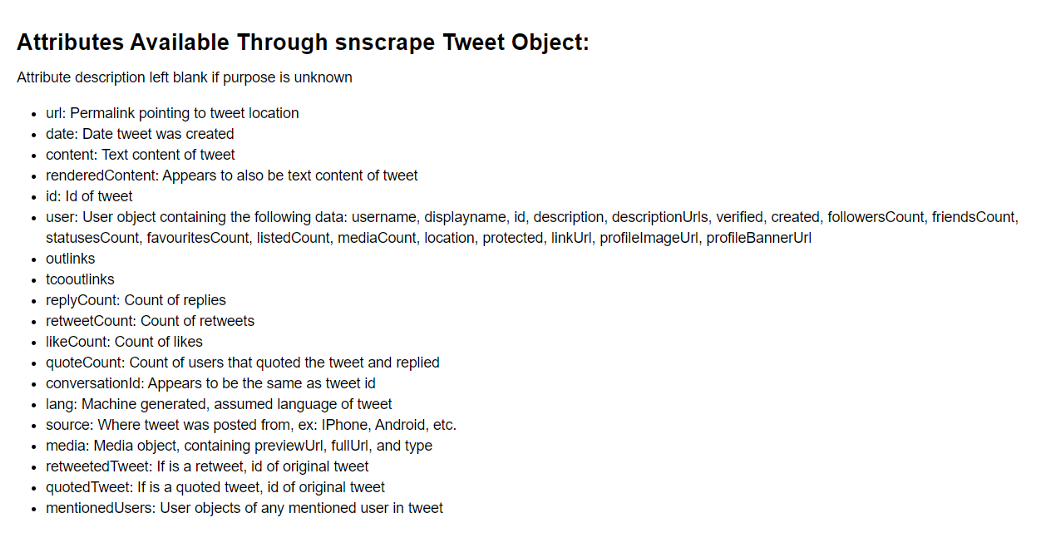

In [70]:
def getNameFromURL(url):
        if url is not None:
            return [str(i).split('/')[-1] for i in url]
        
def sns_query(keyword,since,end):
    # Creating list to append tweet data to
    tweets_list = []

    # Using TwitterSearchScraper to scrape data and append tweets to list
    try:
        # only scrape English tweets which has at least 5 likes and exclude retweets
        for i,tweet in enumerate(sntwitter.TwitterSearchScraper(f'NFT {keyword} since:{since} until:{end} min_faves:1 exclude:retweets lang:en').get_items()):
            tweets_list.append([tweet.user, tweet.content, tweet.url, tweet.likeCount,tweet.retweetCount, tweet.user.followersCount,tweet.mentionedUsers])
    except Exception as e:
        print(e)
    
    result=pd.DataFrame(tweets_list, columns=['User', 'Tweets','Url','likeCount','retweetCount','followersCount','metionedUsers'])
    
    # get user name from url
    result['User'] = result['User'].apply(lambda x: str(x).split('/')[-1])
    # get user names from urls in a list
    
    result['metionedUsers'] = result['metionedUsers'].apply(lambda x: getNameFromURL(x))
    
    #save to local
    result.to_csv(f"../data/NFT {keyword}.csv")
    
    print(f"Task:query {keyword} since {since} to {end} finished!")
    
    return result

### Query by group

1. ethics, ethical, morality, moral   
2. fairness, equity, equality  
3. trust, transparency, transparent   
4. bias, discrimination, racism  
5. diversity, diverse  

In [30]:
ethic_group = ['ethics','ethical', 'morality', 'moral']
fairness_group = ['fairness', 'equity', 'equality']
trust_group = ['trust', 'transparency', 'transparent']
bias_group = ['bias', 'discrimination', 'racism']
diversity_group = ['diversity','diverse','inclusive','inclusivity']

In [71]:
for i in ethic_group:
    result = sns_query(i,'2021-06-01','2022-06-01')

Task:query ethics since 2021-06-01 to 2022-06-01 finished!
Task:query ethical since 2021-06-01 to 2022-06-01 finished!
Task:query morality since 2021-06-01 to 2022-06-01 finished!
Task:query moral since 2021-06-01 to 2022-06-01 finished!


In [72]:
for i in fairness_group:
    result = sns_query(i,'2021-06-01','2022-06-01')

Task:query fairness since 2021-06-01 to 2022-06-01 finished!
Task:query equity since 2021-06-01 to 2022-06-01 finished!
Task:query equality since 2021-06-01 to 2022-06-01 finished!


In [73]:
for i in trust_group:
    result = sns_query(i,'2021-06-01','2022-06-01')

Task:query trust since 2021-06-01 to 2022-06-01 finished!
Task:query transparency since 2021-06-01 to 2022-06-01 finished!
Task:query transparent since 2021-06-01 to 2022-06-01 finished!


In [74]:
for i in bias_group:
    result = sns_query(i,'2021-06-01','2022-06-01')

Task:query bias since 2021-06-01 to 2022-06-01 finished!
Task:query discrimination since 2021-06-01 to 2022-06-01 finished!
'highlightedLabel'
Task:query racism since 2021-06-01 to 2022-06-01 finished!


In [75]:
for i in diversity_group:
    result = sns_query(i,'2021-06-01','2022-06-01')

__init__() missing 1 required positional argument: 'imageUrl'
Task:query diversity since 2021-06-01 to 2022-06-01 finished!
Task:query diverse since 2021-06-01 to 2022-06-01 finished!
__init__() missing 1 required positional argument: 'imageUrl'
Task:query inclusive since 2021-06-01 to 2022-06-01 finished!
Task:query inclusivity since 2021-06-01 to 2022-06-01 finished!


In [76]:
# store tweets of different keywords in respective dataframes
for i in ethic_group+fairness_group+trust_group+bias_group+diversity_group:
    if ' ' in i:
        name = i.replace(' ','_')
        exec('df_{} = pd.read_csv(\'./data/{}.csv\', index_col=[0])'.format(name,'NFT '+i))
    else:
        exec('df_{} = pd.read_csv(\'./data/{}.csv\', index_col=[0])'.format(i,'NFT '+i))

### Combining all tweets

Read all crawled tweets in document and store them to 1 dataframe (df_merged)

In [77]:
import os, glob

path = "./data/"

all_files = glob.glob(os.path.join(path, "NFT *.csv")) #return all filenames in target path

all_df = []
for f in all_files:
    df = pd.read_csv(f, index_col=[0])
    df['file'] = f.split('/')[-1] #add a new column with values of corresponding filename
    all_df.append(df)
    
df_merged = pd.concat(all_df, ignore_index=True, sort=True)

**Store data**

In [78]:
#df_merged.to_csv('../data/df_all_tweets.csv')
df_merged.head()

,Tweets,Url,User,file,followersCount,likeCount,metionedUsers,retweetCount
0,Best team in #NFT community (bias opinion)\n@K...,https://twitter.com/TimeCop0487/status/1531784...,TimeCop0487,data\NFT bias.csv,1637,5,"['KuroCrypto_', 'vinnyski', 'TimeCop0487']",2
1,@psychedelic_nft How can a therapist that does...,https://twitter.com/TrueAlphaGod/status/153176...,TrueAlphaGod,data\NFT bias.csv,1229,9,['psychedelic_nft'],0
2,"Zero-sum thinking, bag bias, elitism, and maxi...",https://twitter.com/LeonidasNFT/status/1531739...,LeonidasNFT,data\NFT bias.csv,48569,69,NaN,11
3,@12am @polygonstudios “97% of people who appli...,https://twitter.com/IcE_yar2000/status/1531730...,IcE_yar2000,data\NFT bias.csv,93,6,"['12am', 'PolygonStudios']",0
4,Looking at NFT projects these days has become ...,https://twitter.com/eddyiskongz/status/1531678...,eddyiskongz,data\NFT bias.csv,72178,46,NaN,7
